<a href="https://colab.research.google.com/github/Midnight93/dataset_edoardo/blob/master/py_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




**COLOR_BGR2HSV Version ( Testing dei metodi di OpenCV )**



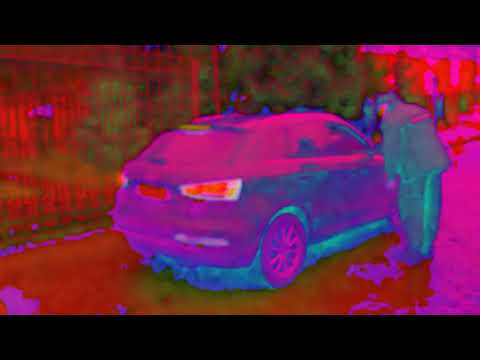

In [42]:
YOUTUBE_ID = 'AkaRdSAKQu8'


YouTubeVideo(YOUTUBE_ID)

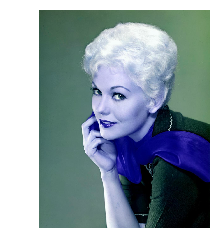

In [45]:
import numpy as np
import cv2
from IPython.display import YouTubeVideo

face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

img = cv2.imread('/content/image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img)
plt.axis('off')
plt.show()

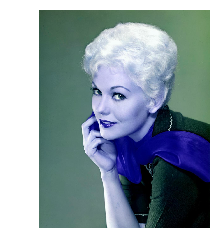

In [46]:
#non funziona su colab :( se lanciato come script sì

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img)
plt.axis('off')
plt.show()

**COLOR_BGR2GRAY (Approccio Classico)**

Detected 1 faces!


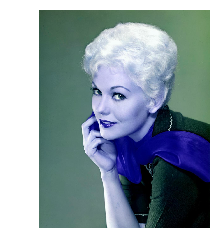

In [47]:
import cv2
import sys
from google.colab.patches import cv2_imshow

#Path 

imagePath = '/content/image.jpg'
cascPath = "/content/haarcascade_frontalface_default.xml"

#Import modelli
faceCascade = cv2.CascadeClassifier(cascPath)
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(1,1),
    flags = cv2.CASCADE_SCALE_IMAGE
)

print("Detected {0} faces!".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(image)
plt.axis('off')
plt.show()

**Versione con input video (.mp4)**

In [0]:
import cv2
import sys

cascPath = sys.argv[1]
faceCascade = cv2.CascadeClassifier(cascPath)

video_capture = 'video.mp4'

while True:
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.cv.CV_HAAR_SCALE_IMAGE
    )

    # Rettangolo dove possiamo mettere la differenza delle aree
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # visualizza nel nostro caso mandiamo solo la request al webservice
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


video_capture.release()
cv2.destroyAllWindows()

 **Versione con input video (Webcam)** -*NON ESEGUIBILE SU COLAB*

In [0]:
import cv2
import sys

cascPath = sys.argv[1]
faceCascade = cv2.CascadeClassifier(cascPath)

video_capture = cv2.VideoCapture(0)

while True:
  
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.cv.CV_HAAR_SCALE_IMAGE
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()